In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
annType = ['segm','bbox']
annType = annType[1]      #specify type here
print 'Running demo for *%s* results.'%(annType)

Running demo for *bbox* results.


In [3]:
#initialize COCO ground truth api
dataDir='../'
dataType='val2014'
annFile = '%s/annotations/instances_%s.json'%(dataDir,dataType)
cocoGt=COCO(annFile)

loading annotations into memory...
Done (t=6.49s)
creating index...
index created!


In [4]:
#initialize COCO detections api
resFile='%s/results/instances_%s_fake%s100_results.json'
resFile = resFile%(dataDir, dataType, annType)
cocoDt=cocoGt.loadRes(resFile)

Loading and preparing results...     
DONE (t=0.03s)
creating index...
index created!


In [5]:
# visialuze gt and dt side by side
imgIds=sorted(cocoGt.getImgIds())
imgIds=imgIds[0:100]
imgId = imgIds[np.random.randint(100)]
img = cocoGt.loadImgs(imgId)[0]
I = io.imread('%s/images/val2014/%s'%(dataDir,img['file_name']))

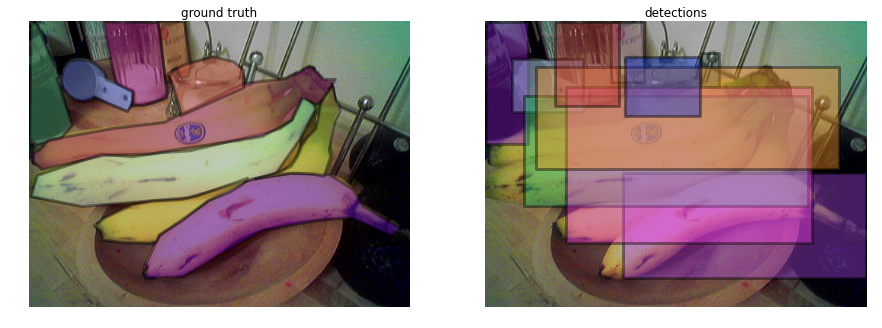

In [6]:
# visialuze gt and dt side by side
fig = plt.figure(figsize=[15,10])

# ground truth
plt.subplot(121)
plt.imshow(I); plt.axis('off'); plt.title('ground truth')
annIds = cocoGt.getAnnIds(imgIds=imgId)
anns = cocoGt.loadAnns(annIds)
cocoDt.showAnns(anns)

# detections
plt.subplot(122)
plt.imshow(I); plt.axis('off'); plt.title('detections')
annIds = cocoDt.getAnnIds(imgIds=imgId)
anns = cocoDt.loadAnns(annIds)
cocoGt.showAnns(anns)

In [7]:
# running evaluation
cocoEval = COCOeval(cocoGt,cocoDt)
cocoEval.params.imgIds  = imgIds
cocoEval.params.useSegm = (annType == 'segm')
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

Running per image evaluation...      
DONE (t=0.68s).
Accumulating evaluation results...   
DONE (t=0.31s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.505
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.697
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.573
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.586
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.519
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.501
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.387
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.594
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.595
